> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate No Show Appointments Dataset 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [30]:

#import required libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

#read file
pts = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
pts.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [31]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# cleaning steps are the following: 

#1. check missing values
pts.info()
pts.isnull().sum()

#3. check duplication 
pts.duplicated()

#2. check incorrect data type
pts.dtypes






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

the cleaning result:
1. there is no dupliactions. 
2. there is no missing values.
3. there is incorrect data type which is patientID since it should be Integer not Float, Scheduleday coverted to Date and AppointmentDay converted to Date.
4. Rename the wrong columns titles. 

In [32]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#1. correct data type which is patientID since it should be Integer not Float
#Scheduleday should be coverted to Date and AppointmentDay to Date.

pts['ScheduledDay']=pd.to_datetime(pts['ScheduledDay'])
pts['AppointmentDay']=pd.to_datetime(pts['AppointmentDay'])
pts['PatientId'] = pts['PatientId'].astype('int64')

#print the information again to check the data type conversion result
pts.info()
pts.head()

#2. rename the wrong columns titles
pts.rename(columns={'Handcap':'Handicap', 'Hipertension':'Hypertension'}, inplace=True)
pts.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (How many no-show and show patients)

Total appointments based on status:
No-show
No     88208
Yes    22319
Name: Age, dtype: int64
Chart below represents No for the patients who showed up, Yes for the patients who didnt


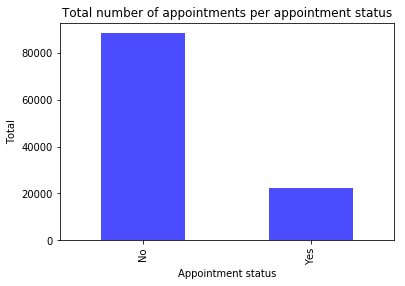

In [33]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#Total appointments 

#count patients appointments and group them by appointment status
counts= pts.groupby(['No-show']).count().Age

print('Total appointments based on status:')
print(counts)
print('Chart below represents No for the patients who showed up, Yes for the patients who didnt')
                     
counts.plot(kind='bar', title='Total number of appointments per appointment status', color='blue', alpha=.7)
plt.xlabel('Appointment status')
plt.ylabel('Total');
plt.legend().set_visible(False)

From the chart above we can notice that the total number of patients who didnt show up for thier appointments is 22319. so in the next sections i will try to focus on no show to investigate more about the reasons and the factors.

### Research Question 2  (what are the possible factors that might affect on the patient's appointment? and as a result, how to improve it ?)

Now, i need ti invistagte what are the reasons of no show patiens in order to improve the patient care.
1. i will count no show patiens for some factors that might have an impact:
lets check patient age, gender, appointemnet day, and SMS recieve

Total no show patients group by age:
Age
0      639
1      415
2      252
3      277
4      282
5      320
6      316
7      301
8      318
9      364
10     304
11     247
12     272
13     303
14     316
15     322
16     353
17     396
18     350
19     394
20     355
21     355
22     351
23     343
24     321
25     352
26     312
27     329
28     332
29     330
      ... 
70      94
71     121
72     101
73      96
74      89
75      81
76      91
77      79
78      89
79      61
80      81
81      63
82      66
83      61
84      35
85      49
86      42
87      27
88      12
89      29
90      23
91      13
92      20
93      10
94       6
95       6
96       1
97       2
98       1
115      3
Name: Gender, Length: 100, dtype: int64
Chart below represents the age average for no show patients Yes: no show patients


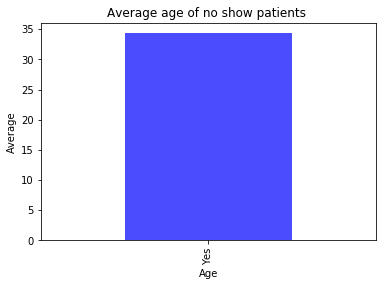

In [34]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#check No show patients per Age averege

#Query the data and retrive only Noshow
pts=pts[pts['No-show'] == 'Yes']


#Find the age average 
pts.groupby('No-show')['Age'].mean().plot(kind='bar', title='Average age of no show patients ', color='blue', alpha=.7)

#count the patients group by Age for printing purpose                     
counts= pts.groupby(['Age']).count().Gender
print('Total no show patients group by age:')
print(counts)
print('Chart below represents the age average for no show patients Yes: no show patients')
plt.xlabel('Age')
plt.ylabel('Average');
plt.legend().set_visible(False)


from the chart above the age average for no show patients is between (30-35)

Total number of appointments based on Gender:
Gender
F    14594
M     7725
Name: Age, dtype: int64
Chart below represents F for Female patients, M for Male patients 


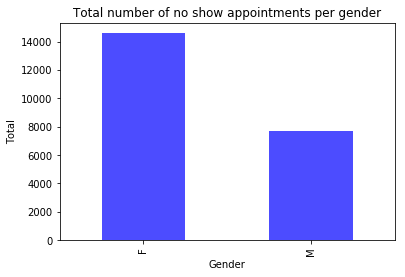

In [35]:

#Query the data and retrive only Noshow
pts=pts[pts['No-show'] == 'Yes']

#count the patients and group by Gender
counts= pts.groupby(['Gender']).count().Age
print('Total number of appointments based on Gender:')
print(counts)
print('Chart below represents F for Female patients, M for Male patients ')
                     
counts.plot(kind='bar', title='Total number of no show appointments per gender', color='blue', alpha=.7)
plt.xlabel('Gender')
plt.ylabel('Total');
plt.legend().set_visible(False)
                     

from the chart above. no show appointments for female patients are higher than male.

Total number of appointments based on weekday:
AppointmentDay
Friday       4037
Monday       4690
Saturday        9
Thursday     3338
Tuesday      5152
Wednesday    5093
Name: Age, dtype: int64


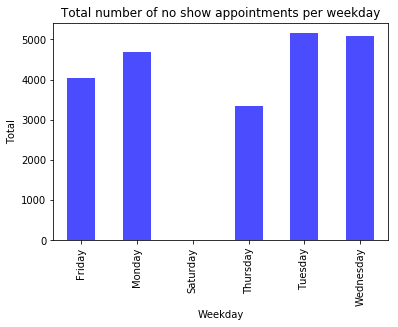

In [36]:
#Query the data and retrive only Noshow
pts=pts[pts['No-show'] == 'Yes']


#Find the day from the appointment day
pts['AppointmentDay'] = pd.to_datetime(pts['AppointmentDay']).dt.weekday_name

#count patients appointments group by appointment day
counts= pts.groupby(pts['AppointmentDay']).count().Age

print('Total number of appointments based on weekday:')
print(counts)

counts.plot(kind='bar', title='Total number of no show appointments per weekday', color='blue', alpha=.7)
plt.xlabel('Weekday')
plt.ylabel('Total');
plt.legend().set_visible(False)

In [ ]:
From the chart above, the hightest total number of no-show patients on Tuesday. 

SMS_received
0    12535
1     9784
Name: Age, dtype: int64
Chart below represents 0 for no show patients who didnt receive SMS, 1 for no show patients who received SMS


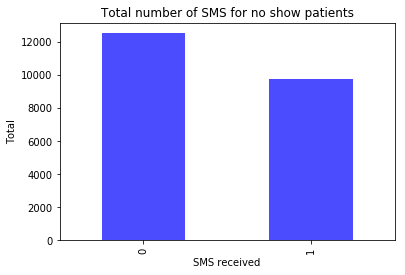

In [37]:

#checking SMS

#Query to import only noshow patients 
pts=pts[pts['No-show'] == 'Yes']

#count no show patients then group them by SMS recived 
counts= pts.groupby(['SMS_received']).count().Age
print(counts)
print('Chart below represents 0 for no show patients who didnt receive SMS, 1 for no show patients who received SMS')
                     
counts.plot(kind='bar', title='Total number of SMS for no show patients', color='blue', alpha=.7)
plt.xlabel('SMS received')
plt.ylabel('Total');
plt.legend().set_visible(False)

from the chart above, we have a high number of no show patients who didnt recieve SMS which is 12535

<a id='conclusions'></a>
## Conclusions


Problem Statement: 

No show appointments have an impact on health care quality as these appointments solts can be used properly. Also, it can affect on patients waiting list since those who didn’t show up will increase the number of the waiting list later. so, the problem can lead to several reasons and impact factors that will be investigated and analyzed more in the next section. 

Data Analysis: 

Data Analysis Process has started with reading the file and data cleaning. then, checking some factors to find out the reasons. the average age of no show appointments was between (30-35). Female patients has the highest chance of missing their appointments than male. as well, Tuesday has the highest number of no show patients. Finally, receiving SMS reminder fo no show patients is high. 

Result and Findings: 

As a result, in order to decrease Total no show appointments the health care facility needs to draw their attention to them and improve the following:

1. improve SMS reminder like having 2nd reminder for both gender specially for female and foucs on Tuesday as it is the most productive day of the week as missing appointments in this day is possible.
2. perform this data analysis process regularly to make sure that no show list is getting decreased.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])